In [1]:
import pandas
import matplotlib.pyplot as plt
#import plotly.express as px
import numpy as np
#from scipy.signal import find_peaks
#from peakdetect import peakdetect
from peakutils import indexes
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Visualising the given data
Plotting the first 15000 readings (15 seconds of ecg data) to clearly view the details.
Also plotting all the data to see complete ecg. Can be zoomed by clicking on the option (top right corner)

<AxesSubplot:title={'center':'Complete ECG'}, xlabel='time'>

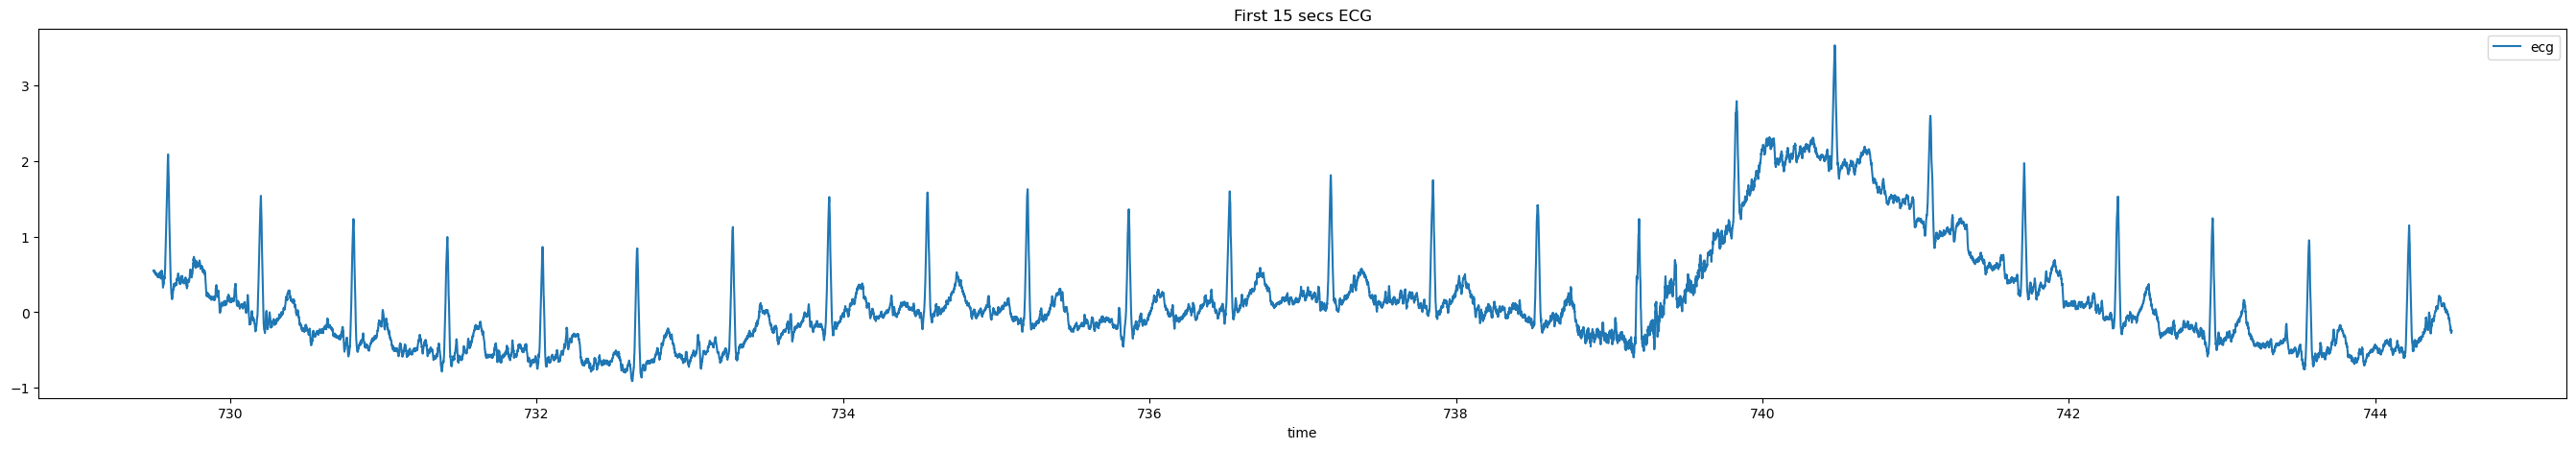

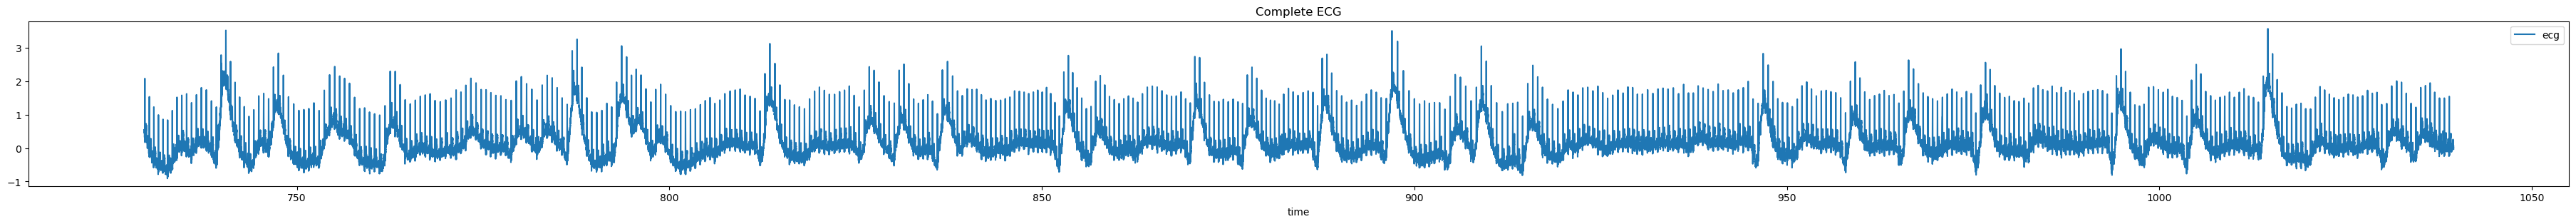

In [2]:
df = pandas.read_csv('/home/vidhi/Documents/VsCode/SecyTAsk/sam_ECG1.csv').set_index('time')
df.plot(figsize=(34,5), title='First 15 secs ECG')
df2 = pandas.read_csv('/home/vidhi/Documents/VsCode/SecyTAsk/sam_ECG.csv').set_index('time')
df2.plot(figsize=(46,3), title='Complete ECG')

### Finding Peak Values
Using the indexes function from __peakutils__ library we get the indexes of the maximas which satisfy the given threshold and minimum distance. Here after a few tries, the values for `min_dist` and `thres` have been found. Since a peak will appear at least after half a second we use min_dist as 500 so the next peak will be considered only if it is at least a dist of 500 readings away from the prev.

In [3]:
p1= indexes(df.ecg.values, min_dist=500, thres= 0.3)
p2 = indexes(df2.ecg.values, min_dist=500, thres= 0.3)
index_list = df2.iloc[p2].index.values.tolist()
print("The list of all timestamps when a maxima occurs is :-")
print(index_list)
print("\nThe exact coordinates of all required maximas :-")
df2.iloc[p2]


The list of all timestamps when a maxima occurs is :-
[729.595, 730.201, 730.805, 731.418, 732.039, 732.658, 733.281, 733.91, 734.551, 735.205, 735.865, 736.523, 737.183, 737.85, 738.534, 739.195, 739.832, 740.472, 741.096, 741.708, 742.319, 742.938, 743.567, 744.22, 744.887, 745.55, 746.212, 746.862, 747.519, 748.193, 748.879, 749.58, 750.27, 750.943, 751.609, 752.292, 752.988, 753.679, 754.4, 755.086, 755.75, 756.41, 757.07, 757.753, 758.435, 759.1, 759.759, 760.433, 761.121, 761.83, 762.533, 763.204, 763.862, 764.542, 765.222, 765.901, 766.571, 767.233, 767.886, 768.551, 769.254, 769.982, 770.698, 771.375, 772.031, 772.69, 773.363, 774.05, 774.738, 775.399, 776.049, 776.715, 777.391, 778.063, 778.766, 779.45, 780.134, 780.84, 781.54, 782.24, 782.937, 783.608, 784.275, 784.94, 785.611, 786.289, 786.962, 787.616, 788.263, 788.922, 789.583, 790.259, 790.947, 791.617, 792.262, 792.918, 793.599, 794.266, 794.916, 795.552, 796.199, 796.859, 797.519, 798.176, 798.834, 799.504, 800.185, 800

,ecg
time,
729.595,2.084375
730.201,1.537500
730.805,1.231250
731.418,0.993750
732.039,0.862500
...,...
1036.348,1.950000
1036.972,1.671875
1037.610,1.496875


### Plotting the Peaks in ECG
We plot the peaks found earlier using the seaborn library. Seaborn is based of matplotlib but has additional features for integration with pandas.

<AxesSubplot:xlabel='time', ylabel='ecg'>

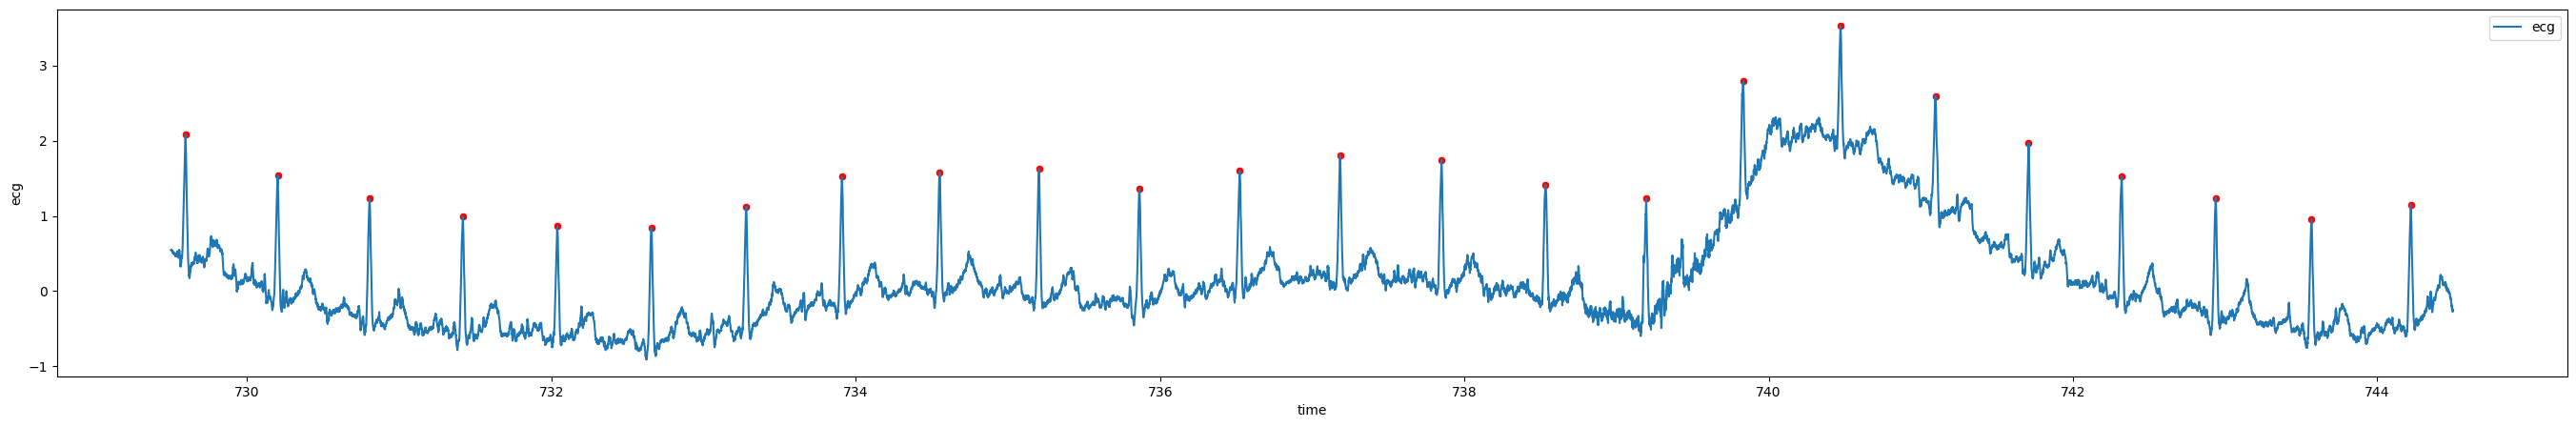

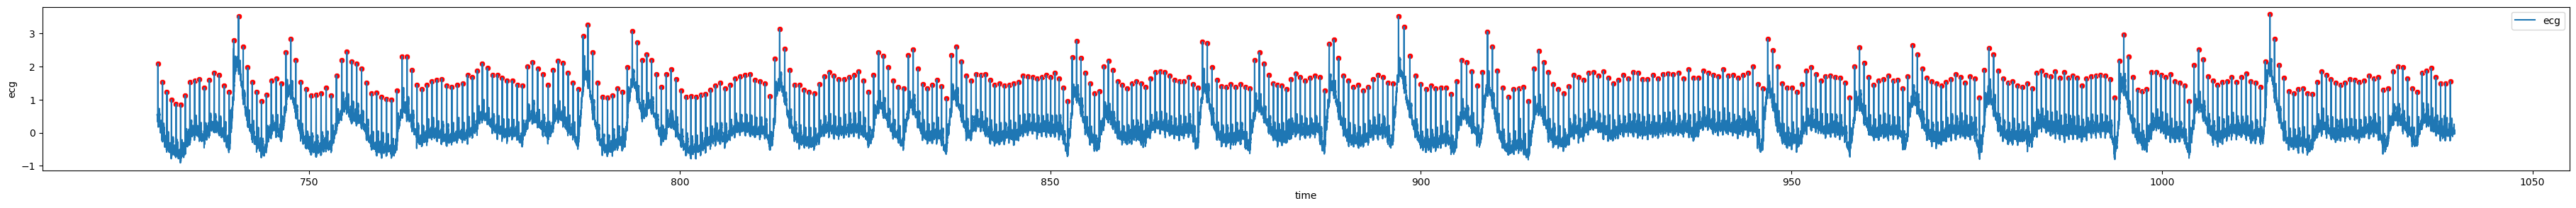

In [4]:
df.plot(figsize=(34,5))
sns.scatterplot(data=df.iloc[p1],x='time', y='ecg', color='red')
df2.plot(figsize=(46,3))
sns.scatterplot(data=df2.iloc[p2],x='time', y='ecg', color='red')

### Finding Heart Rate
We find the time gap b/w each peak. Then find the number of peaks that would occur in 60s, this is the heart rate in bpm of the person. Averaging throughout the entire recording duration we find 
#### The mean heart rate is 91.74bpm

In [5]:
sum=0
for i in range(1,len(index_list),1):
    bpm= 60/(index_list[i]-index_list[i-1])
    sum+=bpm
print("The mean heart rate over the entire recording duration is found to be",sum/len(index_list),"bpm")

The mean heart rate over the entire recording duration is found to be 91.7396292036636 bpm


In [6]:
"COMMENTS (trials)"

#peaks2, _ = find_peaks(df, prominence=1)
#print('Peaks are at indices:', peaks2)
#plt.plot(peaks2, df[peaks2], "ob")

# peaks = peakdetect(df, lookahead=1) 
# higherPeaks = np.array(peaks[0])
# lowerPeaks = np.array(peaks[1])
# plt.plot(df)
# plt.plot(higherPeaks[:,0], higherPeaks[:,1], 'ro')
# plt.plot(lowerPeaks[:,0], lowerPeaks[:,1], 'ko')

# peak_idx, _ = find_peaks(df['ecg'], prominence = 75, height = 150, distance = None)
# peak_data = df.iloc[peak_idx]
# df.plot(x='time', y='ecg', figsize=(28,5)) #original mass spectrum
# plt.scatter(x = peak_data.index, y = peak_data.values, color = 'red', alpha = 0.5)


'COMMENTS (trials)'